## Observations and Insights 

OBSERVATION 1: FOR TUMOR VOLUME SIZE, IT IS HIGHLY DEPENDENT ON THE WEIGHT AND SIZE OF THE MOUSE. THE HIGHER THE WEIGHT OF THE MOUSE, THEY ARE MORE LIKELY TO HAVE A LARGER SIZED TUMOR. HOWEVER, IT SHOULD BE NOTED THAT THE TUMOR VOLUME TO WEIGHT RATIO IS WHAT MATTERS. ALTHOUGH THE VOLUME OF THE TUMOR IS SMALLER IN A SMALLER MOUSE, THE RATIO TO IT'S BODY IS STILL SIMILAR TO THAT OF A LARGER MOUSE. 

OBSERVATION 2: CEFTAMIN HAD THE LARGEST IQR IDENTIFYING IT HAS A LARGER VARIABILITY IN THE DRUG. COMPARED TO THE OTHER THREE EFFECTIVE DRUGS, CEFTAMIN MAY RESULT IN A WIDE ARRAY OF RESULTS, MAKING IT LESS RELIABLE. HOWEVER, THERE MAY BE VARIABILITY UE TO OTHER FACTORS SUCH AS SEX, WEIGHT, ETC.. THEREFORE, FURTHER STUDYING SHOULD BE DONE.

OBSERVATION 3: FOR CAPOMULIN, THERE MIDDLE SIZED MICE, 17 TO 21 GRAMS HAD A LARGER VARIABILITY IN TUMOR SIZE. THIS MAY IDENTIFY THAT FOR SPECIFIC SIZED MICE, THE DRUG IS LESS EFFECTIVE. AN ANALYSIS BY TIMEPOINT FOR EACH OF THE MOUSE WILL RESULT IN FURTHER CLARIFICATION ON THE REASONING OF SUCH VARIABILITY.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse = pd.merge(mouse_metadata,study_results,how="inner")

# Display the data table for preview
mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse["Mouse ID"].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
len(mouse)

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#removing any rows with same timepoint per mouse
filtered_mouse =  mouse.drop_duplicates(subset=['Mouse ID','Timepoint'],keep='last')
filtered_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the clean DataFrame.
print(len(mouse))
#Should be the same since we only removed duplicate timepoints. 
filtered_mouse["Mouse ID"].value_counts()

1893


k403    10
o287    10
j755    10
j984    10
k210    10
        ..
f932     1
v199     1
t573     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

filtered_mouse_group = filtered_mouse.groupby('Drug Regimen')
tumor_mean = filtered_mouse_group.mean()
tumor_med = filtered_mouse_group.median()
tumor_var = filtered_mouse_group.var()
tumor_std_dev = filtered_mouse_group.std()
tumor_SEM = filtered_mouse_group.sem()

t_str = "Tumor Volume (mm3)"

tumor_stats = pd.DataFrame({"Mean":tumor_mean[t_str],
                            "Median":tumor_med[t_str],
                            "Variance":tumor_var[t_str],
                            "Standard Deviation":tumor_std_dev[t_str],
                            "SEM":tumor_SEM[t_str]                                                     
                           })

tumor_stats



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
filtered_mouse[t_str].describe()

count    1888.000000
mean       50.448411
std         8.904752
min        22.050126
25%        45.000000
50%        48.951421
75%        56.324075
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

## Bar and Pie Charts

### Bar Charts

<AxesSubplot:title={'center':'Mouse For Each Drug'}, xlabel='Drug', ylabel='Mouse Count'>

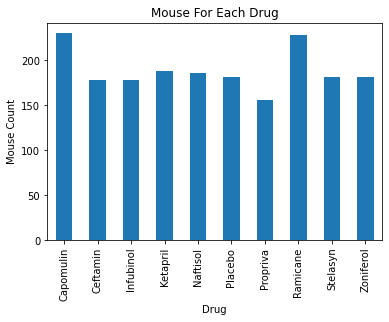

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_count = filtered_mouse_group['Mouse ID'].count()
mouse_bar = mouse_count.plot.bar(x="Drug",y="Mice Count", title = "Mouse For Each Drug")
plt.ylabel("Mouse Count")
plt.xlabel("Drug")
mouse_bar

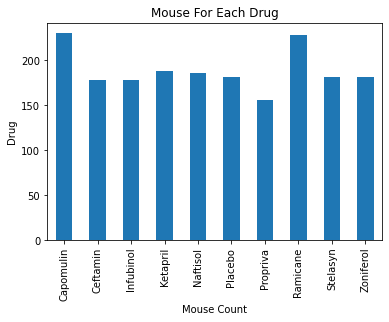

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

mouse_bar_py = mouse_count.plot(kind = 'bar',title = "Mouse For Each Drug")
mouse_bar_py.set_xlabel("Mouse Count")
mouse_bar_py.set_ylabel("Drug")
plt.show()


### Pie Charts

<AxesSubplot:title={'center':'Sex Proportion of Mice'}, ylabel='Sex'>

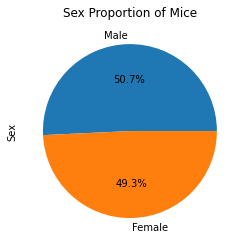

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex = filtered_mouse['Sex'].value_counts()
mouse_pie = mouse_sex.plot.pie(title = "Sex Proportion of Mice",autopct = '%1.1f%%')

mouse_pie


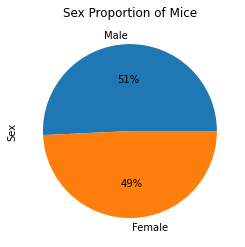

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_bar_py = mouse_sex.plot(kind = 'pie',title = "Sex Proportion of Mice",  autopct='%1.0f%%')

plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

#list of the four treatments
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
regimen_final = pd.DataFrame(columns = filtered_mouse.columns)

#for loop to loop through treatments, find, sort, and keep only the last timepoint 
for treatment in treatments:
    regimen_df = filtered_mouse.loc[filtered_mouse["Drug Regimen"] == treatment]
    regimen_sort = regimen_df.sort_values(['Mouse ID','Timepoint'])
    regimen_last_tp =  regimen_sort.drop_duplicates(subset=['Mouse ID'],keep='last')
    regimen_final = regimen_final.append(regimen_last_tp, ignore_index = True)

regimen_final

# below is initial code searching through each treatment separately

# #Locate each drug and separate out into separate df's
# regimen_list = filtered_mouse.loc[filtered_mouse["Drug Regimen"] == "Capomulin"]
# ramicane = filtered_mouse.loc[filtered_mouse["Drug Regimen"] == "Ramicane"]
# infubinol = filtered_mouse.loc[filtered_mouse["Drug Regimen"] == "Infubinol"]
# ceftamin = filtered_mouse.loc[filtered_mouse["Drug Regimen"] == "Ceftamin"]

# #sort the mouse and timepoint for each mouse. Then delete mouse ID duplicates other than last of each type
# capomulin_sort = capomulin.sort_values(['Mouse ID','Timepoint'])
# capomulin_last =  capomulin_sort.drop_duplicates(subset=['Mouse ID'],keep='last')

# ramicane_sort = ramicane.sort_values(['Mouse ID','Timepoint'])
# ramicane_last =  ramicane_sort.drop_duplicates(subset=['Mouse ID'],keep='last')

# infubinol_sort = infubinol.sort_values(['Mouse ID','Timepoint'])
# infubinol_last =  infubinol_sort.drop_duplicates(subset=['Mouse ID'],keep='last')

# ceftamin_sort = ceftamin.sort_values(['Mouse ID','Timepoint'])
# ceftamin_last =  ceftamin_sort.drop_duplicates(subset=['Mouse ID'],keep='last')

# # concatenate the four different drugs into one combined df
# # frames = [capomulin_last,ramicane_last,infubinol_last,ceftamin_last]
# # final_four = pd.concat(frames)
# # final_four

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,45,38.982878,2
1,b742,Capomulin,Male,7,21,45,38.939633,0
2,f966,Capomulin,Male,16,17,20,30.485985,0
3,g288,Capomulin,Male,3,19,45,37.074024,1
4,g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...
95,x226,Ceftamin,Male,23,28,0,45.000000,0
96,x581,Ceftamin,Female,19,28,45,64.634949,3
97,x822,Ceftamin,Male,3,29,45,61.386660,3
98,y769,Ceftamin,Female,6,27,45,68.594745,4


Capomulin
IQR = 7.781863460000004
Lower Limit = 20.70456164999999
Higher Limit = 51.83201549
Outliers = {'Mouse ID': [], 'Tumor Volume (mm3)': []}

Ramicane
IQR = 9.098536719999998
Lower Limit = 17.912664470000003
Higher Limit = 54.30681135
Outliers = {'Mouse ID': [], 'Tumor Volume (mm3)': []}

Infubinol
IQR = 11.477135160000003
Lower Limit = 36.83290494999999
Higher Limit = 82.74144559000001
Outliers = {'Mouse ID': ['c326'], 'Tumor Volume (mm3)': [36.3213458]}

Ceftamin
IQR = 15.577752179999997
Lower Limit = 25.355449580000002
Higher Limit = 87.66645829999999
Outliers = {'Mouse ID': [], 'Tumor Volume (mm3)': []}



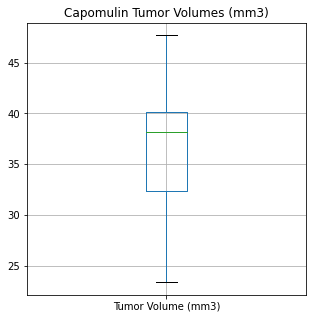

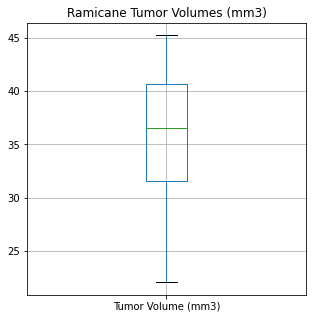

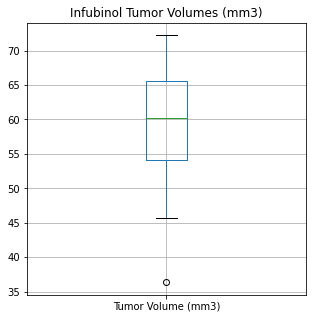

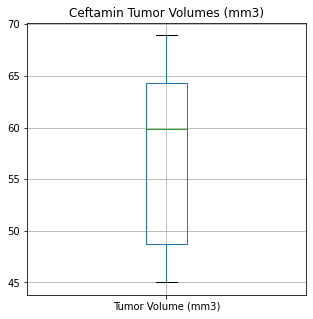

In [13]:
#loop through each treatment and make a separate df which gets overwritten every time
for treatment in treatments:
    each_drug = regimen_final.loc[regimen_final["Drug Regimen"] == treatment]
    
    #calculate IQR, lower bound, and higher bound
    IQR = each_drug["Tumor Volume (mm3)"].describe()['75%']-each_drug["Tumor Volume (mm3)"].describe()['25%']
    low = each_drug["Tumor Volume (mm3)"].describe()['25%'] - 1.5*IQR
    high = each_drug["Tumor Volume (mm3)"].describe()['75%'] + 1.5*IQR
    
    #to get the outliers, iterate each row and see if a tumor size is above or under the high/low bounds
    #if true, it will append to the outlier list (which gets reset for every drug)
    outlier = {"Mouse ID":[],"Tumor Volume (mm3)":[]}
    for row in each_drug.iterrows():
        if (row[1][6] > high) or (row[1][6] < low):
            outlier["Mouse ID"].append(row[1][0])
            outlier["Tumor Volume (mm3)"].append(row[1][6])
    
    #print statements to show each of the necessary info
    print(treatment)   
    print(f'IQR = {IQR}')
    print(f'Lower Limit = {low}')
    print(f'Higher Limit = {high}')
    print(f'Outliers = {outlier}\n')
    
    #make the box plot for each drug
    box = plt.subplots(1, figsize = [5,5], sharey = True)
    box = each_drug.boxplot()
    box = box.set_title(f'{treatment} Tumor Volumes (mm3)')
    
    

## Line and Scatter Plots

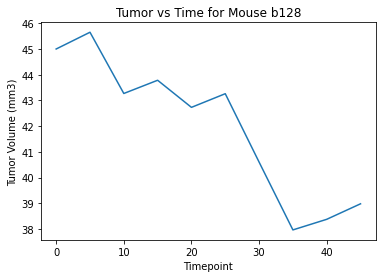

In [14]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#select mouse from original list with all timepoints
capomulin = filtered_mouse.loc[filtered_mouse["Drug Regimen"] == 'Capomulin']
mouse = capomulin.loc[capomulin["Mouse ID"] == 'b128']

#plot
plt.plot(mouse["Timepoint"],mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor vs Time for Mouse b128")
plt.show()

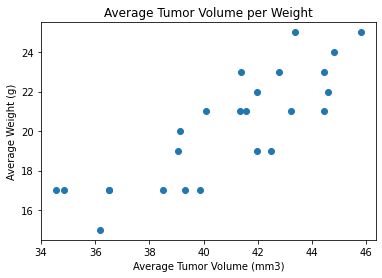

In [15]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#get average tumor weight and mouse weight 
mouse_names = capomulin['Mouse ID'].unique()
avg_weight = []
avg_volume = []

#make a new list for each mouse and find and append the average weight and volume 
for mouse_name in mouse_names:
    specific_mouse = capomulin.loc[capomulin["Mouse ID"] == mouse_name]
    avg_weight.append(specific_mouse["Weight (g)"].mean())
    avg_volume.append(specific_mouse["Tumor Volume (mm3)"].mean())
    
#plot
plt.scatter(avg_volume,avg_weight)
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Average Weight (g)")
plt.title("Average Tumor Volume per Weight")
plt.show()

## Correlation and Regression

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
regress = []
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_volume, avg_weight)
for tumor in avg_volume:
    regress.append(tumor * slope + intercept)
line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line

'y = 0.74x + -10.15'

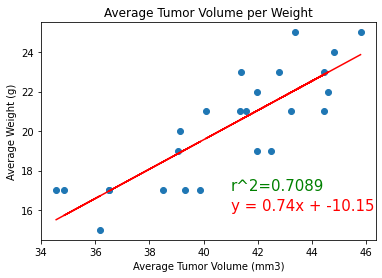

In [17]:
#plot the linear regression 
plt.scatter(avg_volume,avg_weight)
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Average Weight (g)")
plt.title("Average Tumor Volume per Weight")
plt.plot(avg_volume, regress, color='r')
plt.annotate(line,xy=(41,16), fontsize=15,color='r')
plt.annotate(f'r^2={round(rvalue**2,4)}',(41,17),fontsize=15,color='g')
plt.show()